In [43]:

# Load library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from datetime import datetime

In [44]:
# https://trends.google.com/trends/explore?geo=US&q=%2Fm%2F0jt3_q3,Machine%20learning

url = './DS_Vs_ML_Search.csv'

# If a header row does not exist, we set header=None.
# header = None

# Load dataset
dataframe = pd.read_csv(url)

# View first two rows
dataframe.head(2)

,Week,Data science,Machine learning
0,9/22/19,100,86
1,9/29/19,98,84


In [45]:
# Aggregating the data to Monthly - To avoid crowding the plot

#convert week column into datetime object
#dataframe['Week'] = dataframe['Week'].astype('datetime64[ns]')
dataframe['Week'] = pd.to_datetime(dataframe['Week'])
dataframe.head(2)

# Getting month number
dataframe['Month'] = dataframe['Week'].dt.month
# Getting year number
dataframe['Year'] = dataframe['Week'].dt.year
dataframe.head(2)

,Week,Data science,Machine learning,Month,Year
0,2019-09-22,100,86,9,2019
1,2019-09-29,98,84,9,2019


In [46]:
df2 = dataframe.groupby(['Year','Month'] ,as_index=False).agg({'Data science' : 'sum' , 'Machine learning' : 'sum' })

df2.head(2)

,Year,Month,Data science,Machine learning
0,2019,9,198,170
1,2019,10,367,344


In [47]:
df2["Period"] = df2["Year"].astype(str) +"-"+ df2["Month"].astype(str)
#df2['period'] = df2[['Year', 'Month']].agg('-'.join, axis=1)
df2.head(2)

,Year,Month,Data science,Machine learning,Period
0,2019,9,198,170,2019-9
1,2019,10,367,344,2019-10


In [48]:
# converting these into arrays
#All of plotting functions expect np.array or np.ma.masked_array
# as input. Classes that are 'array-like' such as pandas data objects
# and np.matrix may or may not work as intended.
# It is best to convert these to np.array objects prior to plotting.

#data_asarray = dataframe.values
#data_asarray
Year_Month = df2['Period'].values
Data_science = df2['Data science'].values
Machine_learning = df2['Machine learning'].values

<Figure size 360x1440 with 0 Axes>

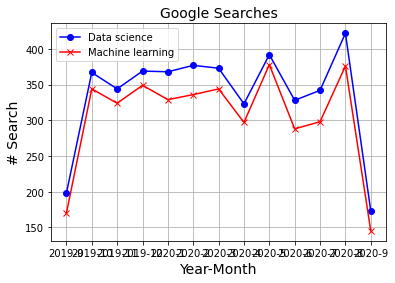

<Figure size 360x1440 with 0 Axes>

In [49]:
plt.plot(Year_Month, Data_science, color='blue', marker='o', label='Data science')
plt.plot(Year_Month, Machine_learning, color='red', marker='x' ,label='Machine learning')
plt.title('Google Searches', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('# Search', fontsize=14)
plt.legend()
plt.grid()
plt.figure(figsize=(5,20))




No handles with labels found to put in legend.


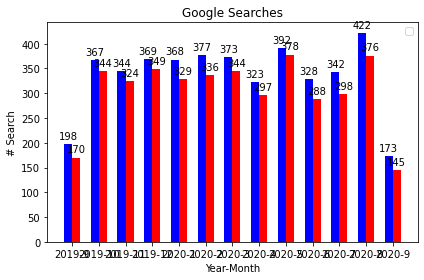

In [50]:
width =0.3
x = np.arange(len(Year_Month))

fig, ax = plt.subplots()

rects1 = ax.bar(x-width/2, Data_science, width=width, color='blue')
rects2 = ax.bar(x+ width/2, Machine_learning, width=width, color='red')
ax.set_xticks(x)
ax.set_xticklabels(Year_Month)
ax.set_ylabel('# Search')
ax.set_xlabel('Year-Month')
ax.set_title('Google Searches')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

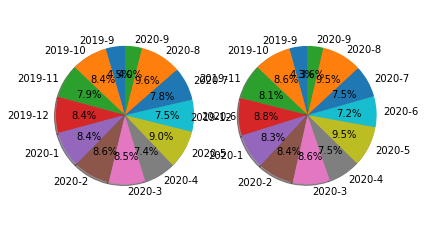

In [51]:
fig = plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(1,2)
  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.pie(Data_science, labels=Year_Month, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.pie(Machine_learning, labels=Year_Month, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')


plt.show()